In [2]:
%matplotlib inline
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
import cv2, os
import numpy as np
import random as rd
from tqdm.auto import tqdm
import visualkeras as vk
print(tf.config.list_physical_devices('GPU'))
allImgs = './train_val/'
trainMap = pd.read_csv('train.csv')
valMap = pd.read_csv('val.csv')
ext='.png'
trainImgs=[]
trainLabels=[]
valImgs=[]
valLabels=[]

for i in range(len(trainMap['imgIndex'])):
    trainImgs.append(cv2.cvtColor(cv2.imread(allImgs+str(trainMap['imgIndex'][i])+ext),cv2.COLOR_BGR2GRAY))
trainImgs = np.array(trainImgs)

trainLabels = np.array(trainMap['label'])
trainImgs=np.array(trainImgs).astype('float32')/255.0

for i in range(len(valMap['imgIndex'])):
    valImgs.append(cv2.cvtColor(cv2.imread(allImgs+str(valMap['imgIndex'][i])+ext), cv2.COLOR_BGR2GRAY))
valImgs=np.array(valImgs).astype('float32')/255.0
valLabels=np.array(valMap['label'])

clsDict={'vbar_categorical': 0, 'hbar_categorical': 1, 'dot_line': 2, 'pie': 3, 'line': 4}
print(clsDict)
keyz=list(clsDict.keys()) 

trainLabels=np.array(list(map(lambda x: clsDict[x], trainLabels)))
trainLabels=np.array(keras.utils.to_categorical(trainLabels))
valLabels=np.array(list(map(lambda x: clsDict[x], valLabels)))
valLabels=np.array(keras.utils.to_categorical(valLabels))
print(valLabels[:6])

2022-08-06 17:39:42.692253: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 17:39:42.700544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 17:39:42.700803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
{'vbar_categorical': 0, 'hbar_categorical': 1, 'dot_line': 2, 'pie': 3, 'line': 4}
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [85]:
noPieImg=cv2.imread('test/0.png')
pieImg=cv2.imread('test/28.png')
noPieImg=cv2.cvtColor(noPieImg, cv2.COLOR_BGR2GRAY)
pieImg=cv2.cvtColor(pieImg, cv2.COLOR_BGR2GRAY)

In [88]:

circles = cv2.HoughCircles(pieImg, cv2.HOUGH_GRADIENT, 0.1, 10,param1=100, param2=20, minRadius=30)

In [89]:
print(circles)

[[[79.5 78.5 36.5]
  [61.5 67.5 57.3]
  [91.5 68.5 52.4]
  [79.5 57.5 36.9]
  [71.5 71.5 46.7]]]


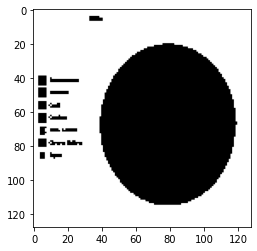

In [92]:
plt.imshow(pieImg, cmap='Greys_r')

In [91]:
for i in range(pieImg.shape[0]):
    for j in range(pieImg.shape[1]):
        if pieImg[i, j]<220:
            pieImg[i,j]=0
        else:
            pieImg[i,j]=255

In [224]:
params = cv2.SimpleBlobDetector_Params()
params.filterByArea=True
params.minArea=1200
params.filterByConvexity = True
params.minConvexity = 0.5
params.filterByCircularity = True
params.minCircularity = 0.4
params.filterByInertia = True
params.minInertiaRatio = 0.3
det=cv2.SimpleBlobDetector_create(params)
def detectr(img):
#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#             if img[i, j]<220:
#                 img[i,j]=0
#             else:
#                 img[i,j]=255
    kps=det.detect(img)
#     print(kps)
    blank = np.zeros((1, 1))
    blobs = cv2.drawKeypoints(img, kps, blank, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(blobs)
    return len(kps)

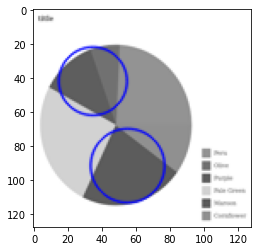

In [225]:
pies=[14, 21, 23, 28, 29,42, 44, 47, 48]
for i in pies:
    detectr(cv2.cvtColor(cv2.imread('./test/'+str(i)+'.png'), cv2.COLOR_BGR2GRAY))

In [211]:
x=open('train_val.csv').read().split('\n')
x=list(filter(lambda y: 'pie' in y, x))
x=[i.split(',')[0] for i in x]

602 0
603 2
604 0
606 0
619 2
626 0
635 0
649 0
662 2
682 0
687 0
693 0
695 0
705 0
717 0
725 2
728 0
734 0
738 0
771 0
781 0
789 0
794 0


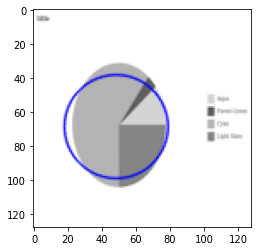

In [226]:
## testing circle detection in all train pie imgs
for i in x:
    nos=detectr(cv2.cvtColor(cv2.imread('./train_val/'+str(i)+'.png'), cv2.COLOR_BGR2GRAY))
    if nos!=1:
        print(i, nos)

In [184]:
xn=open('train_val.csv').read().split('\n')
xn=list(filter(lambda y: 'pie' not in y, xn))
xn=[i.split(',')[0] for i in xn]
xn.remove('image_index')
xn.remove('')

7 1
48 1
168 1
183 1
238 1
284 1


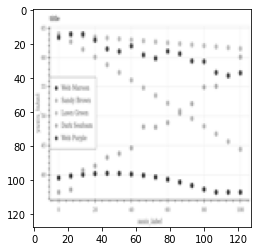

In [227]:
## testing circle tracing in no circle imgs
for i in xn:
    nos=detectr(cv2.cvtColor(cv2.imread('./train_val/'+str(i)+'.png'), cv2.COLOR_BGR2GRAY))
    if nos!=0:
        print(i, nos)